A Decision Tree is a supervised machine learning algorithm used for both:

* Classification (most common)

* Regression



It works just like a flowchart or a game of “20 Questions” — where each question helps you split the data into smaller groups until you reach a decision.

In [1]:
# Simple Intuition:

In [2]:
# Let’s create a decision tree that helps you decide whether you should watch a movie tonight.

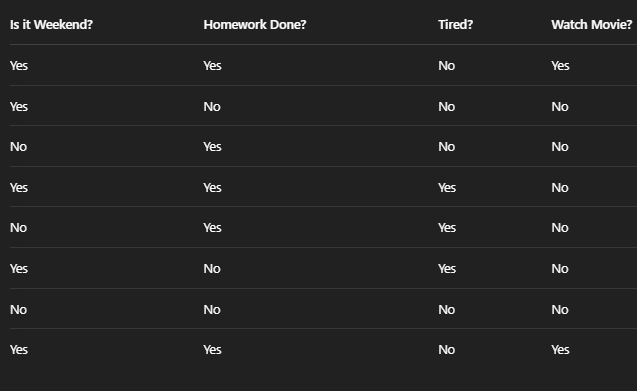

## We ask these questions in order:

Is it the Weekend?

If No → No movie

If Yes → 2. Is Homework Done?

If No → No movie

If Yes → 3. Are you Tired?

If Yes → No movie

If No → ✅ Yes, watch the movie!


## The Decision Tree Flow:

            [Is it Weekend?]
              /           \
           No             Yes
          No         [Homework Done?]
                         /       \
                      No         Yes
                    No        [Tired?]
                                 /     \
                              Yes      No
                              No       Yes


In [3]:
# So, the final decision depends on:

# Weekend?

# Homework?

# Tiredness?

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [5]:
data = {
    'Is_Weekend': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Homework_Done': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'],
    'Tired': ['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Watch_Movie': ['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes']
}

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Is_Weekend,Homework_Done,Tired,Watch_Movie
0,Yes,Yes,No,Yes
1,Yes,No,No,No
2,No,Yes,No,No
3,Yes,Yes,Yes,No
4,No,Yes,Yes,No


In [8]:
# Convert categorical data to numeric (Label Encoding)
df_encoded = df.copy()
for column in df_encoded.columns:
    df_encoded[column] = df_encoded[column].map({'Yes': 1, 'No': 0})

In [9]:
# Define features and target
X = df_encoded[['Is_Weekend', 'Homework_Done', 'Tired']]
y = df_encoded['Watch_Movie']

In [10]:
# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

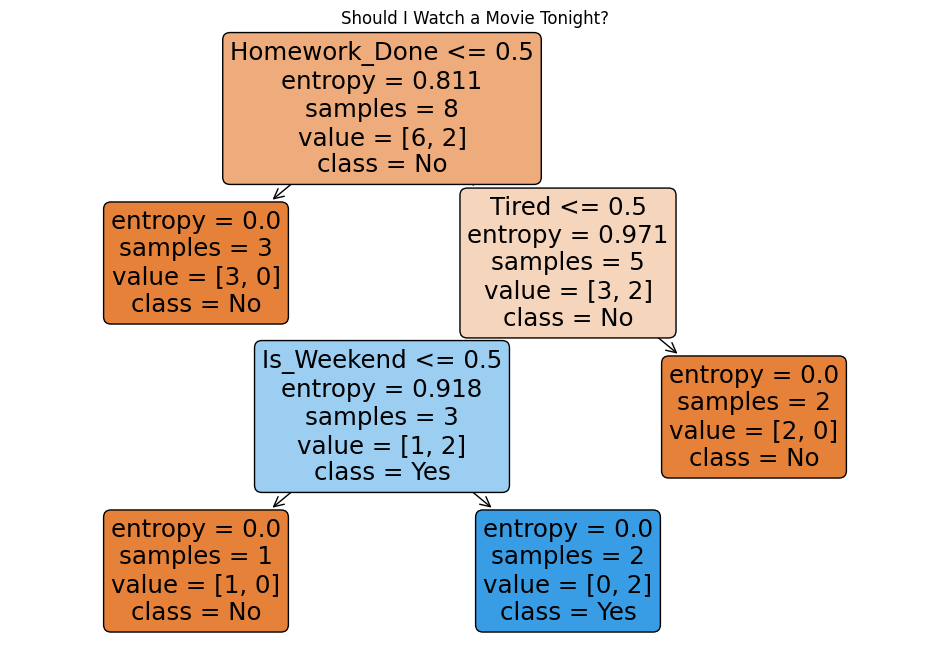

In [11]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model,
          feature_names=['Is_Weekend', 'Homework_Done', 'Tired'],
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)

plt.title("Should I Watch a Movie Tonight?")
plt.show()

In [12]:
# Nodes = Questions (like “Is_Weekend”)

# Branches = Yes/No splits

# Leaves = Final decision (Yes or No)